In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('Churn_Modelling.csv', encoding='latin-1')
#loading the data sets Churn_Modelling

In [27]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

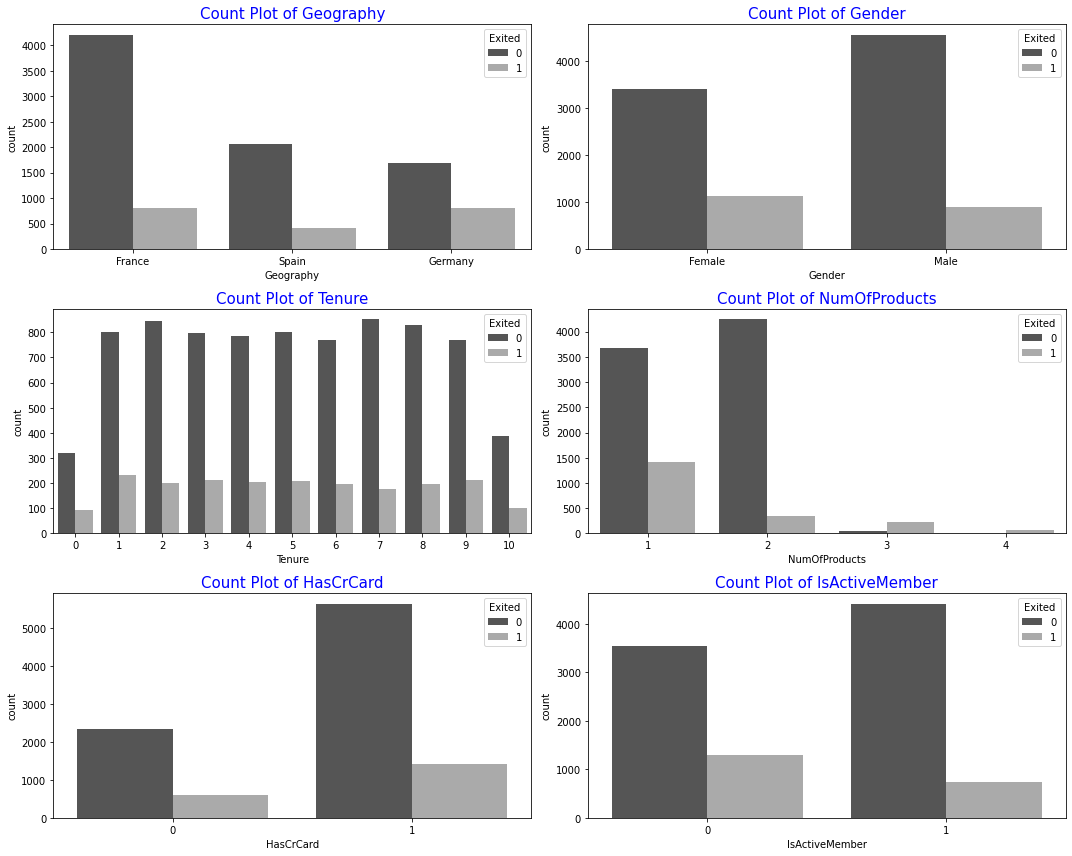

In [55]:
#VISUALIZATIONS
fig, ax = plt.subplots(3, 2, figsize = (15, 12))
plt.title("Visualization")
sns.countplot('Geography', hue = 'Exited', data = df, ax = ax[0][0],palette='gist_gray')
sns.countplot('Gender', hue = 'Exited', data = df, ax = ax[0][1],palette='gist_gray')
sns.countplot('Tenure', hue = 'Exited', data = df, ax = ax[1][0],palette='gist_gray')
sns.countplot('NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1],palette='gist_gray')
sns.countplot('HasCrCard', hue = 'Exited', data = df, ax = ax[2][0],palette='gist_gray')
sns.countplot('IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1],palette='gist_gray')

ax[0][0].set_title('Count Plot of Geography',color='blue',fontsize=15)
ax[0][1].set_title('Count Plot of Gender',color='blue',fontsize=15)
ax[1][0].set_title('Count Plot of Tenure',color='blue',fontsize=15)
ax[1][1].set_title('Count Plot of NumOfProducts',color='blue',fontsize=15)
ax[2][0].set_title('Count Plot of HasCrCard',color='blue',fontsize=15)
ax[2][1].set_title('Count Plot of IsActiveMember',color='blue',fontsize=15)

plt.tight_layout()
plt.show()

In [56]:
df.dtypes
#DESCRIPTIVE STASTICS

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [30]:
df_num = df[['RowNumber','Tenure','CustomerId','CreditScore','Age','NumOfProducts','HasCrCard','IsActiveMember','Exited']]
df_cat = df[['Surname','Geography','Gender']]
df_num.head()

,RowNumber,Tenure,CustomerId,CreditScore,Age,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,2,15634602,619,42,1,1,1,1
1,2,1,15647311,608,41,1,0,1,0
2,3,8,15619304,502,42,3,1,0,1
3,4,1,15701354,699,39,2,0,0,0
4,5,2,15737888,850,43,1,1,1,0


In [31]:
df_cat.head()


,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [32]:
df_num.describe()


,RowNumber,Tenure,CustomerId,CreditScore,Age,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,5.012800,1.569094e+07,650.528800,38.921800,1.530200,0.70550,0.515100,0.203700
std,2886.89568,2.892174,7.193619e+04,96.653299,10.487806,0.581654,0.45584,0.499797,0.402769
min,1.00000,0.000000,1.556570e+07,350.000000,18.000000,1.000000,0.00000,0.000000,0.000000
25%,2500.75000,3.000000,1.562853e+07,584.000000,32.000000,1.000000,0.00000,0.000000,0.000000
50%,5000.50000,5.000000,1.569074e+07,652.000000,37.000000,1.000000,1.00000,1.000000,0.000000
75%,7500.25000,7.000000,1.575323e+07,718.000000,44.000000,2.000000,1.00000,1.000000,0.000000
max,10000.00000,10.000000,1.581569e+07,850.000000,92.000000,4.000000,1.00000,1.000000,1.000000


In [33]:
df_cat.describe(exclude = ['int64','float64'])


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [59]:
print("Column          Missing values")
print("------------------------------")
df.isnull().sum()
#HANDLE THE MISSING VALUES

Column          Missing values
------------------------------


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [38]:
df.rename(columns=new_names, inplace=True)
df.head()

,RowNumber,CustomerId,Surname,credit_score,country,gender,age,tenure,balance,number_products,owns_credit_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
#REPLACE OUTLIERS
def detect_outlier(df):
 outlier = []
 threshold = 3
 mean = np.mean(df)
 std = np.std(df)
 for i in df:
     z_score = (i - mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outlier
 CreditScore_list = df['CreditScore'].tolist()
 Balance_list = df['Balance'].tolist()
 EstimatedSalary_list = df_cat['EstimatedSalary'].tolist()
 CreditScore_outlier = detect_outlier(CreditScore_list)
 CreditScore_outlier
 Output-[359, 350, 350, 358, 351, 350, 350, 350]
 Balance_outlier = detect_outlier(Balance_list)
 Balance_outlier
 EstimatedSalary_outlier = detect_outlier(EstimatedSalary_list)
 EstimatedSalary_outlier

In [40]:
print("Shape of Data before removing outliers: {}".format(df.shape))

Shape of Data before removing outliers: (10000, 14)


In [62]:
x = pd.get_dummies(x)

x.head()
x.shape
#ENCODING

(10000, 2944)

In [63]:
#SPILT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES


x = df.iloc[:,0:10]
y = df.iloc[:,10]

print(x.shape)
print(y.shape)

print(x.columns)

(10000, 10)
(10000,)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts'],
      dtype='object')


In [66]:
#SCALE THE INDEPENDENT VARIABLES
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = pd.DataFrame(x_train)
x_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts
2967,2968,15595324,Daniels,579,Germany,Female,39,5,117833.30,3
700,701,15803457,Hao,750,France,Female,32,5,0.00,2
3481,3482,15644686,Kennedy,729,Spain,Female,34,9,53299.96,2
1621,1622,15777797,Kovalyova,689,Spain,Male,38,5,75075.14,1
800,801,15747542,Perez,605,France,Male,52,7,0.00,2


In [65]:
#SPILT THE DATA INTO TRAINING AND TESTING
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7500, 10)
(7500,)
(2500, 10)
(2500,)
